In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml, sys
import csv
from resistors_utils import V2power

In [2]:
# runsToPlot = [11, 12, 13, 14]
runsToPlot = [7, 8, 11, 12, 13, 14]

In [3]:
samples = yaml.load(open('samples/runs.yml'), Loader=yaml.FullLoader)
sysCond = yaml.load(open('samples/systemConditions.yml'), Loader=yaml.FullLoader)


res = {}
for r in runsToPlot:
    run_name = 'run'+str(r)
    dset = samples[run_name]
    cond = sysCond[dset['conditions']]
    support = cond['support']
    if not support in res.keys():
        res[support] = {'dTL': [], 'dTC': [], 'dTR': [], 'P':[]}
    
    heatPower = 0
    if 'heatPadV' in dset.keys():
        heatPower = V2power(dset['heatPadV'], R0=cond['heatPadR'], N_dut=1, N_resistors=1)[0]
    
    csvname = 'results/'+run_name+'.txt'
    csvfile = open(csvname, 'r')
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        if row['# '] == 'Cooldiff':
            res[support]['P'].append(heatPower)
            res[support]['dTL'].append(float(row['pkg L']))
            res[support]['dTC'].append(float(row['pkg C']))
            res[support]['dTR'].append(float(row['pkg R border']))
            break

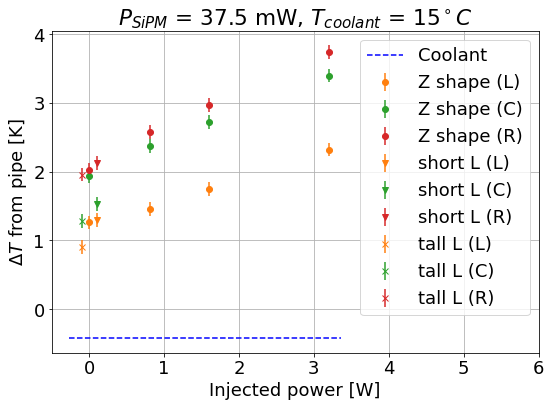

In [5]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8,6))
colors = {'L':'1', 'C':'2', 'R':'3'}
marker = ['o', 'v', 'x']
offset = {'tall L':-0.1, 'short L':0.1, 'Z shape':0}

for i, (shape, dic) in enumerate(res.iteritems()):
    for side in 'LCR':
        plt.errorbar(np.array(dic['P']) + offset[shape], dic['dT'+side], [0.1]*len(dic['P']), fmt=marker[i], color='C'+colors[side], label=shape+' ('+side+')')

plt.plot(list(plt.gca().set_xlim()), 2*[15 - (19.157-3.734)], 'b--', label='Coolant')
plt.legend(loc='best')
plt.xlabel('Injected power [W]')
plt.ylabel(r'$\Delta T$ from pipe [K]')
plt.grid(axis='x')
plt.grid(axis='y')
plt.xlim(-0.5, 6)
plt.title(r'$P_{SiPM}$ = 37.5 mW, $T_{coolant}$ = 15$^\circ C$')
plt.tight_layout()
plt.savefig('./fig/200117_resultsSummary.png')